In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn as sk
import re

In [2]:
# 한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['figure.figsize'] = (15, 7)

In [ ]:
팀 상황 알아보기(삼성 라이온즈)

In [3]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_team2.xlsx', encoding='utf-8', index=False)
samsung = df[df.Team == '삼성'].reset_index(drop=True)
notsam = df[df.Team != '삼성'].reset_index(drop=True)
samsung.head()

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
0,삼성,1982,18.61,887,3043,2647,429,705,126,18,...,0.739,0.338,104.3,2,80,54,26,0,0.675,2.0
1,삼성,1983,23.31,1249,3847,3383,448,889,143,14,...,0.726,0.332,110.3,4,100,46,50,4,0.479,7.5
2,삼성,1984,24.07,1262,3756,3298,435,889,147,18,...,0.739,0.339,113.9,2,100,55,45,0,0.550,-4.0
3,삼성,1985,29.97,1513,4250,3644,552,1005,181,22,...,0.772,0.351,117.9,1,110,77,32,1,0.706,0.0
4,삼성,1986,30.54,1527,4119,3617,475,997,177,22,...,0.744,0.346,123.2,2,108,70,37,1,0.654,-1.5


In [4]:
df.corr()['순위'].sort_values().head(10)

승률     -0.829632
승      -0.632079
WRC+   -0.621007
WAR    -0.612050
wOBA   -0.414898
OBP    -0.392446
OPS    -0.364792
AVG    -0.343150
SLG    -0.331033
SB     -0.238424
Name: 순위, dtype: float64

In [ ]:
팀의 순위와 가장 관계가 높은 타격 지표는 WRC+로 -0.6의 높은 상관관계를 가짐. 이는 WRC+가 높을 수록 팀 순위가 높다는 것을 의미함.
(순위는 낮은 숫자인 1에 가까울 수록 좋지만, WRC+는 높을 수록 좋으므로 상관관계는 +가 아닌 -로 나타남.)

따라서 본 분석에서는 WRC+를 중심으로 타자들을 분석함.

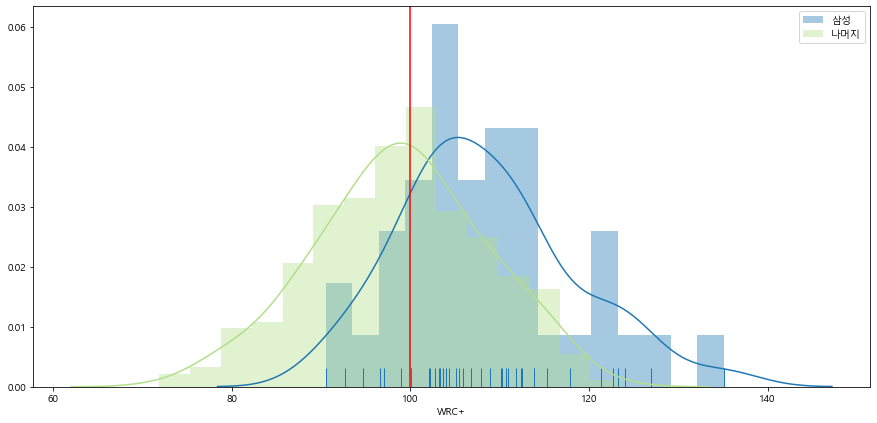

In [5]:
color = sns.color_palette('Paired', 9)
sns.distplot(samsung['WRC+'], bins=15, rug=True, color=color[1], label='삼성')
sns.distplot(notsam['WRC+'], bins=15, color=color[2], label='나머지')
plt.axvline(x=100, color='r')
plt.legend()
plt.show()

In [6]:
under = samsung[samsung['WRC+']<100]
under

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
25,삼성,2007,20.97,1657,4895,4186,497,1062,191,9,...,0.706,0.326,97.0,4,126,62,60,4,0.508,11.5
29,삼성,2011,25.18,1689,5145,4437,625,1150,193,20,...,0.719,0.334,98.9,1,133,79,50,4,0.612,0.0
35,삼성,2017,16.82,1786,5707,5095,757,1419,255,36,...,0.768,0.337,92.7,9,144,55,84,5,0.396,30.0
36,삼성,2018,19.89,1717,5766,5109,776,1471,241,29,...,0.787,0.344,96.6,6,144,68,72,4,0.486,23.0
37,삼성,2019,17.45,1652,5533,4866,622,1245,230,26,...,0.718,0.328,94.7,8,144,60,83,1,0.420,28.0
38,삼성,2020,15.66,1865,5574,4923,699,1317,211,12,...,0.732,0.333,90.5,8,144,64,75,5,0.460,19.5


In [ ]:
삼성 라이온즈 역사상 WRC+가 평균인 100 이하로 떨어진 적은 손에 꼽을 정도임. 즉, 삼성은 리그 내에서도 항상 높은 생산성을 가진 타선을
자랑했던 팀이고 심지어 2000년대 중반의 침체기 때도 2007년을 제외하고는 평균 이상의 생산성을 유지했음.

In [7]:
years = [2007, 2011, 2016, 2017, 2018, 2019, 2020]
compare = pd.DataFrame()

for year in years:
    s = samsung[samsung.Season == year]
    compare = pd.concat([compare, s[['Season', 'WRC+', 'WAR', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA']]])

compare.reset_index(inplace=True, drop=True)
compare

,Season,WRC+,WAR,AVG,OBP,SLG,OPS,wOBA
0,2007,97.0,20.97,0.254,0.341,0.365,0.706,0.326
1,2011,98.9,25.18,0.259,0.343,0.376,0.719,0.334
2,2016,100.1,22.21,0.293,0.367,0.439,0.806,0.360
3,2017,92.7,16.82,0.279,0.340,0.428,0.768,0.337
4,2018,96.6,19.89,0.288,0.355,0.432,0.787,0.344
5,2019,94.7,17.45,0.256,0.329,0.389,0.718,0.328
6,2020,90.5,15.66,0.268,0.338,0.394,0.732,0.333


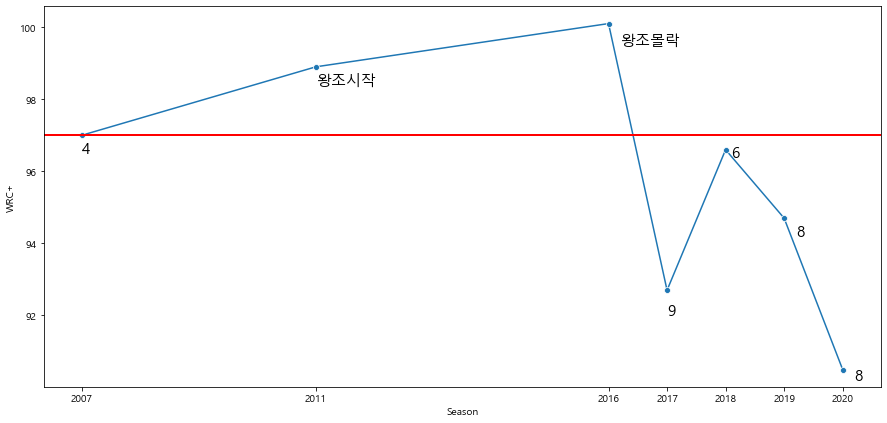

In [8]:
sns.lineplot(compare.Season, compare['WRC+'], marker='o')
plt.axhline(y=97, color='r', linewidth=2)

plt.text(2007, 96.5, '4', fontsize=15)
plt.text(2011, 98.4, '왕조시작', fontsize=15)
plt.text(2016.2, 99.5, '왕조몰락', fontsize=15)
plt.text(2017, 92, '9', fontsize=15)
plt.text(2018.1, 96.4, '6', fontsize=15)
plt.text(2019.2, 94.2, '8', fontsize=15)
plt.text(2020.2, 90.2, '8', fontsize=15)

plt.xticks(compare.Season)
plt.show()

In [ ]:
하지만, FA와 은퇴로 팀의 클린업을 담당하던 주요 타자들이 이탈한 2016년을 기점으로, 삼성 타자들의 WRC+는 2007년의 소위 '삼점 라이온즈'
시절 이하로 급격하게 추락함. 암흑기 동안 꾸준하게 기록중인 100 이하의 팀WRC+는 타자가 타석에 들어서서 무엇을 해도 평균보다 더 점수를
못낸다는 것을 의미함. 다만, 팀 타선의 생산성이 2007년 수준으로 살짝 반등했었던 2018년에 팀이 마지막까지 가을 야구를 경쟁했었다는
것을 생각해보면, 삼성은 타선만 뒷받침 된다면 충분히 재도약이 가능할 것으로 보임.

In [9]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_batter2.xlsx', encoding='utf-8', index=False)

for idx in df.index:
    if len(df.iloc[idx].Team) == 2:
        x = df.iloc[idx].copy()
        x.Team = x.Team[-1]
        df.iloc[idx] = x

df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,백인천,1982,1943-11-27,M,DH,5.88,72,298,250,55,...,5,0,3,0.412,0.497,0.740,1.237,0.528,227.0,39
1,윤동균,1982,1949-07-02,O,LF,4.13,77,334,284,54,...,3,0,4,0.342,0.428,0.532,0.960,0.430,164.6,33
2,이만수,1982,1958-09-19,삼,C,4.12,78,322,270,46,...,13,0,1,0.289,0.399,0.500,0.899,0.405,147.6,24
3,김봉연,1982,1952-01-13,해,DH,3.68,74,304,269,55,...,8,0,1,0.331,0.405,0.636,1.040,0.453,180.5,30
4,김우열,1982,1949-09-09,O,CF,3.46,62,255,210,43,...,0,0,1,0.310,0.428,0.533,0.961,0.426,161.9,33


In [37]:
compare2

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,로하스,2020,1990-05-24,K,RF,7.80,142,628,550,116,...,11,0,8,0.349,0.417,0.680,1.097,0.467,180.9,30
1,김하성,2020,1995-10-17,키,SS,6.87,138,622,533,111,...,12,3,3,0.306,0.397,0.523,0.921,0.407,147.4,25
2,양의지,2020,1987-06-05,N,C,5.95,130,528,461,86,...,11,1,6,0.328,0.400,0.603,1.003,0.432,153.3,33
3,터커,2020,1990-07-06,K,RF,5.70,142,631,542,100,...,12,0,4,0.306,0.398,0.557,0.955,0.420,148.9,30
4,최형우,2020,1983-12-16,K,DH,5.70,140,600,522,93,...,9,0,3,0.354,0.433,0.590,1.023,0.450,168.4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,이성열,2020,1984-07-13,한,DH,-0.93,79,248,227,23,...,4,0,0,0.203,0.270,0.330,0.601,0.277,57.5,36
132,김규성,2020,1997-03-08,K,2B,-1.01,103,182,157,21,...,1,11,0,0.178,0.246,0.261,0.507,0.226,21.0,23
133,김태진,2020,1995-10-07,K,3B,-1.03,82,280,263,28,...,2,2,1,0.236,0.273,0.274,0.547,0.258,41.9,25
134,박찬호,2020,1995-06-05,K,SS,-1.15,141,530,479,63,...,14,12,3,0.221,0.274,0.273,0.548,0.254,39.9,25


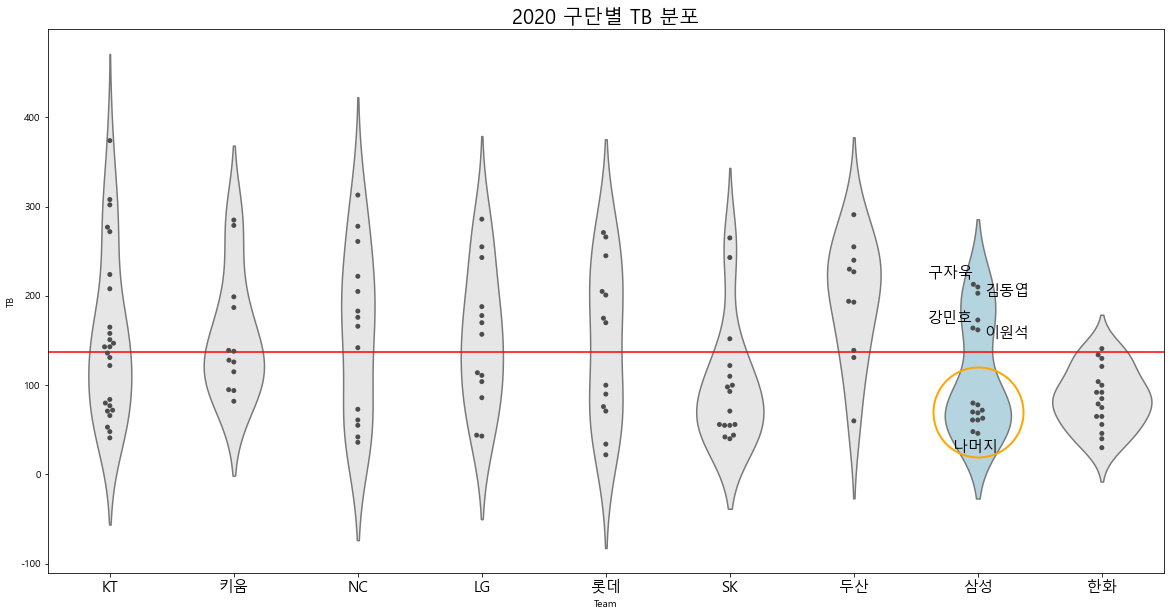

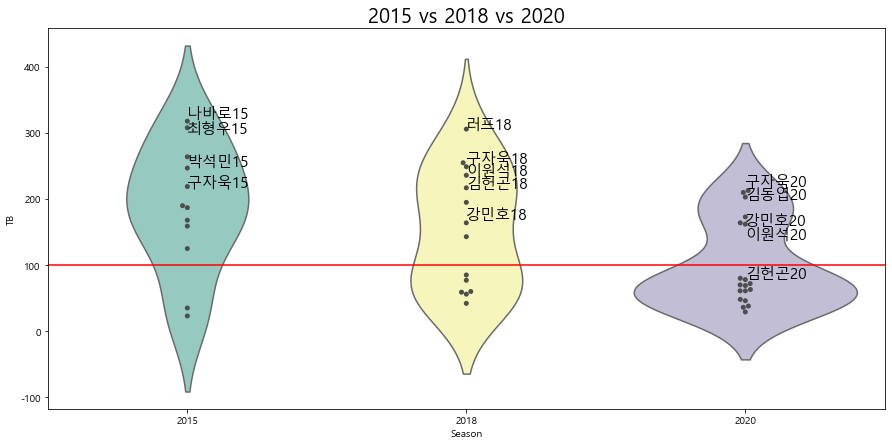

In [33]:
compare2 = df2020[df2020.PA > 128].reset_index(drop=True).copy()
sam2015 = df[(df.Season == 2015) & (df.Team == '삼') & (df.PA > 100)]
sam2018 = df[(df.Season == 2018) & (df.Team == '삼') & (df.PA > 100)]
sam2020 = df2020[(df2020.Team == '삼') & (df2020.PA > 100)]
compare3 = pd.concat([sam2015, sam2018, sam2020])

palette = ['0.9', '0.9', '0.9', '0.9', '0.9','0.9', '0.9', 'lightblue', '0.9']
plt.figure(figsize=[20,10])

# violin 2020
plt.title('2020 구단별 TB 분포', fontsize=20)
sns.violinplot(x=compare2.Team, y=compare2.TB, orient='v', inner=None, palette=palette)
plt.axhline(y=compare2.TB.mean(), color='r')
sns.swarmplot(x='Team', y='TB', data=compare2, color='0.3')
plt.plot(7, 70, 'o', ms= 45* 2, mec='Orange', mfc='none', mew=2)

plt.xticks(np.arange(0, 9), labels = ['KT', '키움', 'NC', 'LG', '롯데', 'SK', '두산', '삼성', '한화'], fontsize=15)
plt.text(6.8, 25, '나머지', fontsize=15)
plt.text(6.6, 221, '구자욱', fontsize=15)
plt.text(7.05, 200, '김동엽', fontsize=15)
plt.text(6.6, 170, '강민호', fontsize=15)
plt.text(7.05, 153, '이원석', fontsize=15)

plt.show()

# violin samsung
plt.title('2015 vs 2018 vs 2020', fontsize=20)
sns.violinplot(x='Season', y='TB', data=compare3, orient='v', inner=None, palette='Set3')
sns.swarmplot(x='Season', y='TB', data=compare3, color='0.3')

plt.text(0, 323, '나바로15', fontsize=15)
plt.text(0, 300, '최형우15', fontsize=15)
plt.text(0, 250, '박석민15', fontsize=15)
plt.text(0, 219, '구자욱15', fontsize=15)

plt.text(1, 236, '이원석18', fontsize=15)
plt.text(1, 170, '강민호18', fontsize=15)
plt.text(1, 217, '김헌곤18', fontsize=15)
plt.text(1, 255, '구자욱18', fontsize=15)
plt.text(1, 306, '러프18', fontsize=15)

plt.text(2, 140, '이원석20', fontsize=15)
plt.text(2, 160, '강민호20', fontsize=15)
#plt.text(2, 80, '김헌곤20', fontsize=15)
plt.text(2, 220, '구자욱20', fontsize=15)
plt.text(2, 200, '김동엽20', fontsize=15)


plt.axhline(y=100, color='r')

plt.show()

In [ ]:
현재 삼성 팀 타선의 현주소를 확인하기 위해 팀별 TB에 대한 violinplot을 그려봤음.

우선 올해 준우승을 차지한 두산 타자들 성적 분포는 모두 평균 이상에 위치해 있는 것을 볼 수 있음. 이런 두산의 분포는 정확하게 왕조시절인
2015년 삼성의 violinplot과 일치하는데, 쉽게 말해 현재 두산 선수들은 모두 개개인의 기량이 매우 뛰어나지만, 그만큼 기량이 뛰어난 주전
선수들에 대한 의존도가 높다는 것을 의미함. 그렇기 때문에 두산 역시 이번 FA에서 주전들의 대규모 이탈이 발생할 경우, 삼성, SK처럼 
하위권으로 추락할 가능성이 매우 높음. 그에 비해 우승을 차지한 NC는 두산에 비해서는 상위권이 두텁지 않지만 전체적으로 골고루 분포된
안정적인 팀타선을 자랑함. 특히, 이 두 팀은 상하위권의 격차가 크지 않고 중위권의 선수들이 매우 탄탄하기 때문에, 주전 일부가 슬럼프를
겪더라도 항상 평균적인 활약이 보장되는 타선임. 그리고 만약 하위권의 선수들이 중상위권으로 성장한다면 올해 두산처럼 평균이상의 선수들로
구성된 강타선을 만들 것으로 보여짐.

그에 비해 올해 하위권을 차지한 삼성, SK, 한화의 분포를 보면 이 세팀이 하위권을 차지한 이유를 확인할 수 있음. 한화의 경우는 모든 타자들이
평균 이하의 성적을 냈기 때문에 최하위로 마무리했고, 삼성과 SK 타자들은 분포 상단에 위치한 일부 선수 몇명을 제외하고는 극단적으로 
하향평준화 되어 있음. 쉽게말해, 삼성과 SK 이 두팀은 선수간의 기량 차이가 극심하다는 것을 의미함. 특히 SK와는 달리 삼성은 중위권 그룹이
전혀 존재하지 않고 상하위 그룹이 뚜렷하게 구분될 정도로 하향평준화가 심각한 수준임. 그러다보니 기량이 좋은 선수들에게 모든 부담이 전가될
수밖에 없고, 이는 삼성이 올해 역사상 최악의 팀 WRC+를 기록한 원인이 되었음.


추가적으로, 그나마 가을야구 경쟁을 했던 2018년과 올해의 타선을 비교해보면 2년 동안 리빌딩은 커녕 이 팀이 얼마나 퇴보했는지 드러남.
2018년 상위권에 위치했던 선수들 중 올해 상위권에 새롭게 이름을 올린 사람은 김동엽을 제외하고는 단 한명도 없음. 심지어 김동엽은 삼성에서
키워낸 유망주도 아니고 트레이드로 데려온 선수라는 것을 봤을 때, 삼성이 암흑기 동안 외친 리빌딩은 현재 전혀 찾아볼 수가 없는 상황임.

특히, 구자욱을 제외한다면 상위권에 위치한 강민호와 이원석 모두 34세 이상의 베테랑이고, 그마저도 상위권 제일 끝에서 겨우 버틴 수준이기
때문에, 삼성 타선은 내년에 게임처럼 하위권의 유망주들이 갑자기 성장하지 않는 이상, 타선 양극화는 더욱 심해질 것으로 보임. 하지만 2년동안
중위권으로 도약한 유망주가 단 한명도 없었다라는 것을 생각해보면, 유망주의 성장을 바라는 것은 비현실적임. 따라서, 현실적으로 하향평준화된
타선을 구제할 방법은 FA를 통한 타선 보강이 유일함.

In [38]:
compare4 = df2020[df2020.PA > 128].reset_index(drop=True).copy()
falist = ['오재일', '최주환', '허경민', '김재호', '정수빈', '최형우']

for idx in compare4.index:
    if compare4.iloc[idx].Team != '삼':
        if compare4.iloc[idx].Name in falist:
            x = compare4.iloc[idx].copy()
            x.Team = 'FA'
            compare4.iloc[idx] = x
        else:
            x = compare4.iloc[idx].copy()
            x.Team = 'Other'
            compare4.iloc[idx] = x

compare4.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,로하스,2020,1990-05-24,Other,RF,7.80,142,628,550,116,...,11,0,8,0.349,0.417,0.680,1.097,0.467,180.9,30
1,김하성,2020,1995-10-17,Other,SS,6.87,138,622,533,111,...,12,3,3,0.306,0.397,0.523,0.921,0.407,147.4,25
2,양의지,2020,1987-06-05,Other,C,5.95,130,528,461,86,...,11,1,6,0.328,0.400,0.603,1.003,0.432,153.3,33
3,터커,2020,1990-07-06,Other,RF,5.70,142,631,542,100,...,12,0,4,0.306,0.398,0.557,0.955,0.420,148.9,30
4,최형우,2020,1983-12-16,FA,DH,5.70,140,600,522,93,...,9,0,3,0.354,0.433,0.590,1.023,0.450,168.4,37


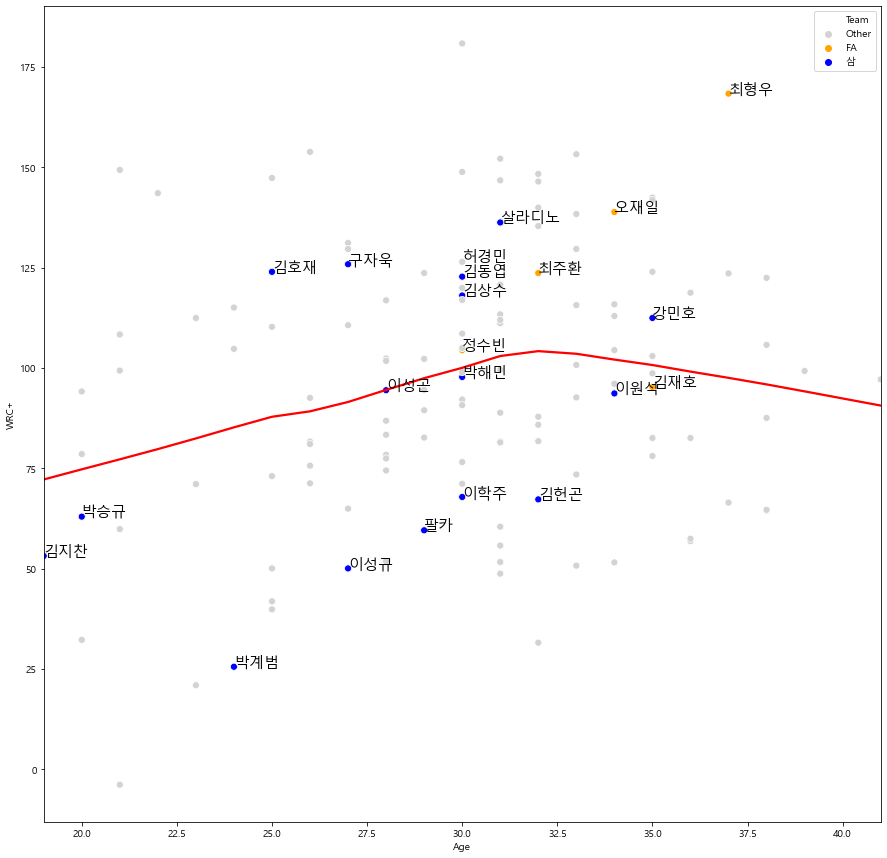

In [39]:
plt.figure(figsize=[15, 15])

X = compare4[(compare4.Team == '삼') | (compare4.Team == 'FA')].Age
Y = compare4[(compare4.Team == '삼') | (compare4.Team == 'FA')]['WRC+']
name = compare4[(compare4.Team == '삼') | (compare4.Team == 'FA')].Name


sns.regplot(x='Age', y='WRC+', lowess=True, data=compare4, line_kws={'color': 'red'}, scatter=False)
sns.scatterplot('Age', 'WRC+', data=compare4, hue=compare4.Team, s=50, palette=['lightgrey','orange','blue'])

for x, y, n in zip(X, Y, name):
    if n == '허경민': # 허경민, 김동엽이 겹침
        plt.text(x, y+4, n, fontsize=15)
    else:
        plt.text(x, y, n, fontsize=15)
        
plt.show()

In [ ]:
올해의 삼성타선을 살펴보면 구자욱, 김동엽, 강민호, 김상수를 제외하고는 모두 생산성이 최하위권에 위치함. 특히 올해 대놓고 기회를 
부여받았던 이성규와 대체용병 팔카는 평균에도 한참 못미치는 압도적인 꼴지를 기록하면서 주전으로 뛰면서도 오히려 -의 효과를 만든 주범이 
되었음. 그래도 앞서 말했듯이 35세의 강민호가 반등에 성공하며 선방을 해냈고, 구자욱과 김동엽이 해당 나이대에서 최상위권의 WRC+를 
기록한것은 긍정적인 면임.

전체적으로 처참한 성적의 삼성 타자들에 비해 올해 FA 대상자가 된 선수들을 살펴보면, 평균 근처의 김재호와 정수빈을 제외한다면 최형우, 
허경민, 오재일, 최주환 모두 삼성 타선에 큰 도움이 될 수 있는 선수들임. 이 중, 김상수와 포지션이 겹치는 최주환을 제외한다면, FA로
영입할 선수는 오재일, 최형우, 허경민으로 좁혀짐. 하지만 이 세 선수 외에도 내부 FA로 3루수 이원석이 풀리기 때문에 이원석의 
재계약 여부 역시 고민해봐야 함.

In [ ]:
# 에이징 커브 알아보기

In [40]:
name = set(df.Name)
aging_df = pd.DataFrame()

for n in name:
    active = df[df.Name == n].Season
    
    if len(active) > 8:
        aging_df = pd.concat([aging_df, df[df.Name == n]], ignore_index=True)
        
aging_df = aging_df[aging_df.PA > 100]
aging_df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
2,정훈,2012,1987-07-18,롯,SS,-0.24,78,137,125,12,...,2,8,1,0.200,0.217,0.296,0.513,0.225,30.5,25
3,정훈,2013,1987-07-18,롯,SS,1.68,113,398,341,50,...,8,14,5,0.258,0.328,0.364,0.692,0.316,82.2,26
4,정훈,2014,1987-07-18,롯,2B,3.32,124,558,477,89,...,10,6,2,0.294,0.386,0.398,0.784,0.362,103.6,27
5,정훈,2015,1987-07-18,롯,2B,3.41,135,562,486,85,...,14,7,3,0.300,0.382,0.420,0.802,0.363,110.1,28
6,정훈,2016,1987-07-18,롯,2B,0.73,121,439,370,48,...,12,8,2,0.262,0.362,0.338,0.700,0.331,82.5,29


In [41]:
aging_df.groupby(aging_df.Age).nunique().Name

Age
18      1
19     28
20     45
21     45
22     73
23    142
24    179
25    189
26    213
27    228
28    230
29    241
30    237
31    229
32    201
33    179
34    148
35    113
36     80
37     53
38     37
39     18
40     10
41      8
Name: Name, dtype: int64

In [42]:
aging_df.drop(aging_df[(aging_df.Age == 18) | (aging_df.Age > 38)].index, axis=0, inplace=True)

group_df = aging_df.groupby(aging_df.Age).mean().round(3).drop('Season', axis=1)
group_df.reset_index(inplace=True)
group_df.head()

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,SO,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+
0,19,1.191,88.036,269.500,236.964,33.250,61.679,11.429,1.607,5.464,...,48.071,4.893,4.071,1.893,0.256,0.328,0.380,0.708,0.323,92.118
1,20,1.648,94.956,311.822,273.244,38.044,74.000,13.089,1.978,5.556,...,52.444,5.133,5.511,2.156,0.265,0.334,0.386,0.719,0.327,97.984
2,21,1.791,101.222,340.178,297.067,41.800,80.600,13.756,2.022,6.578,...,51.089,5.778,6.844,2.000,0.261,0.329,0.380,0.709,0.321,93.020
3,22,2.010,97.904,341.877,297.082,43.164,79.712,13.986,1.740,8.192,...,49.877,6.370,5.589,3.384,0.259,0.330,0.389,0.720,0.326,97.815
4,23,2.038,100.594,338.259,294.252,41.832,79.021,14.385,2.070,7.322,...,49.350,5.804,6.350,2.524,0.259,0.331,0.384,0.716,0.325,97.419


In [43]:
# to plot multiple graphs

def multi_graph(df, records, figsize = [15, 15]):
    plt.rcParams['figure.figsize'] = figsize

    for idx, record in enumerate(records):
        plt.subplot(len(records), len(records)//2, idx+1)
        sns.regplot(x='Age', y=record, data=df, order=2)
        plt.title(record, fontsize=15)
        plt.axvline(x=33, color='r', linewidth=1)
        plt.xticks(df.Age)
    
    plt.tight_layout()
    plt.show()

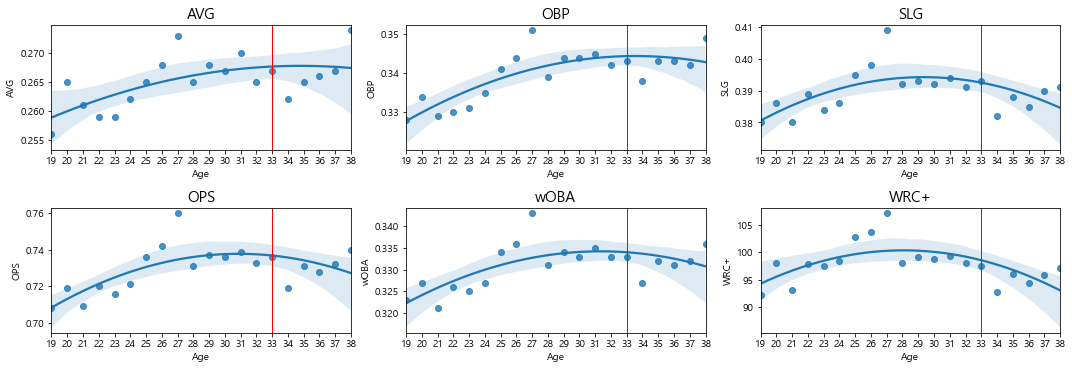

In [44]:
multi_graph(group_df, ['AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WRC+'])

In [ ]:
KBO의 타자들은 25~30세에 전성기를 보낸 후, 33세를 기점으로 주요 타격지표가 꺾이기 시작함. 특히, 33세 이후에도 어느정도 유지가 되는 다른 
지표들에 비해 장타율, OPS, wOBA, WRC+의 급격한 감소는 이 지표들이 타자들의 에이징 커브를 판단하기 가장 적합한 지표라는 것을 의미함.

In [98]:
oh = aging_df[aging_df.Name ==  '오재일']
lee = aging_df[aging_df.Name ==  '이원석']
heo = aging_df[aging_df.Name ==  '허경민']
choi = aging_df[aging_df.Name ==  '최형우']

fadf = pd.concat([oh, lee, heo, choi]).reset_index(drop=True)
fadf.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,오재일,2011,1986-10-29,넥,DH,-0.01,46,118,100,13,...,2,1,1,0.230,0.333,0.310,0.643,0.307,80.7,25
1,오재일,2012,1986-10-29,넥,1B,-0.47,87,228,212,16,...,3,2,4,0.203,0.235,0.354,0.588,0.268,60.9,26
2,오재일,2013,1986-10-29,두,1B,1.01,55,144,117,16,...,0,1,3,0.299,0.406,0.479,0.884,0.400,140.0,27
3,오재일,2014,1986-10-29,두,1B,0.18,75,155,132,10,...,1,0,2,0.242,0.342,0.364,0.706,0.328,85.7,28
4,오재일,2015,1986-10-29,두,1B,1.84,66,213,180,33,...,5,1,2,0.289,0.387,0.594,0.981,0.414,158.4,29


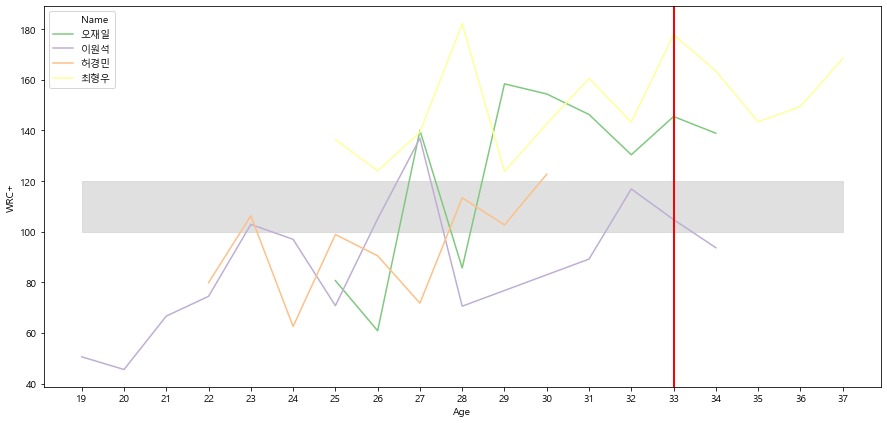

In [46]:
minx = min(fadf.Age)
maxx = max(fadf.Age)

plt.figure(figsize=(15, 7))
sns.lineplot(fadf.Age, fadf['WRC+'], hue=fadf.Name, palette='Accent')
plt.fill([minx, minx, maxx, maxx], [100, 120, 120, 100], color='lightgrey', alpha=0.7)
plt.axvline(x=33, color='r', linewidth=2)
plt.xticks(fadf.Age.unique())

plt.show()

In [ ]:
상세 분석에 앞서 주요 대상들의 WRC+의 변화를 비교해보면, 이제 시기상 전성기를 보내는 중인 허경민을 제외하고, 베테랑 FA인 오재일, 최형우,
이원석 모두 에이징 커브 시작점인 33세를 기준으로 하락세로 접어들었다는 것을 확인할 수 있음. 그 중, 최형우는 에이징 커브를 이겨내고 
반등에 성공했으며, 오재일은 뚜렷한 반등은 없으나 여전히 140 이상의 수준급의 WRC+를 유지중임. 하지만, 이원석은 커리어하이 시즌인
2018년 이후 꾸준히 하락세이고, 올해 결국 평균치를 이탈했다는 점에서 WRC+ 변화 상으로는 가장 위험한 FA 대상자로 보임.

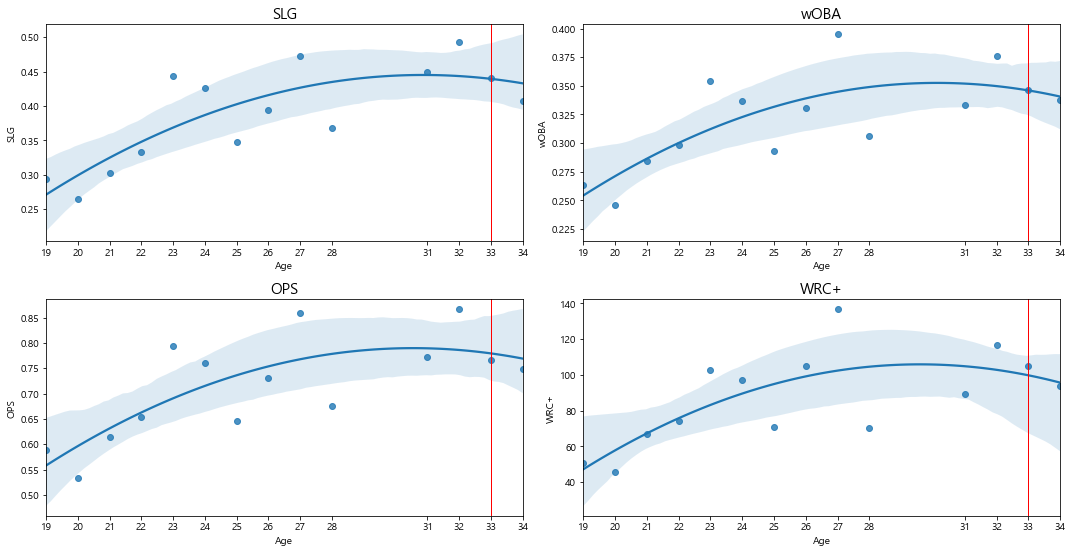

In [47]:
# 이원석
multi_graph(lee, ['SLG', 'wOBA', 'OPS', 'WRC+'])

In [ ]:
앞서 언급한 에이징커브를 확인할 주요 지표들인 장타율, wOBA, OPS, WRC+를 확인해 보면, 이원석의 WRC+는 평균 이하이기는 하나 다행히
에이징 커브 상 정상 궤도 내에 위치해 있음. 그러나 올해 장타율이 신뢰구간 하단에 겨우 걸칠 정도로 심각하게 저하되었다라는 점은
주목해야할 부분임. 다행히 OPS는 장타율의 하락에도 어느정도 선방했지만, 만약 내년에도 뚜렷한 반등을 만들지 못하고 현재 추세가 계속되면,
앞서 말했듯 이원석은 이후 팀 타선에서 아무런 역할을 해주지 못 할 것으로 보임.

그렇기 때문에 이원석과 재계약을 한다면 다소 위험성이 있어 보이지만, 현재 삼성타선을 생각해보면 이원석 정도의 생산력을 가진 선수도 없기
때문에 1~2년 계약이나 성적반등을 이끌어 낼만한 옵션을 적극적으로 사용해야할 것으로 보임.

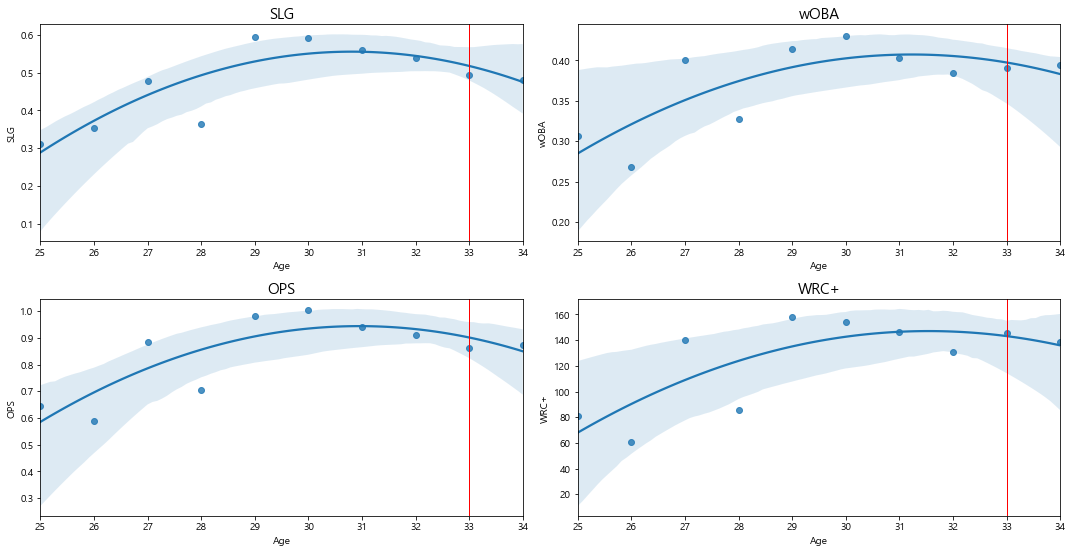

In [48]:
#오재일
multi_graph(oh, ['SLG', 'wOBA', 'OPS', 'WRC+'])

In [ ]:
삼성 입장에서 가장 매력적인 FA 대상자는 오재일이 분명해 보임. 올해 최악의 생산성을 기록한 이성규가 맡았던 1루수 자리를 완벽히 소화할
수 있고 기록상으로도 확실한 해결사 능력을 갖춘 선수임. 하지만 가장 신경쓰이는 부분은 역시 나이로 인한 기량저하 여부임.

In [113]:
oh.reset_index(drop=True, inplace=True)
oh = oh.assign(percent_K=lambda x: (x.SO / x.PA)*100)
oh = oh.assign(percent_BB=lambda x: (x.BB / x.PA)*100)
oh = oh.assign(BB_K=lambda x: (x.BB / x.SO))
oh = oh.assign(babip = lambda x: (x.H - x.HR) / (x.AB - x.SO - x.HR + x.SF))
oh[['Season', 'PA', 'WRC+', 'Age', 'percent_K', 'percent_BB', 'BB_K', 'babip']]

,Season,PA,WRC+,Age,percent_K,percent_BB,BB_K,babip
0,2011,118,80.7,25,20.338983,12.711864,0.625000,0.289474
1,2012,228,60.9,26,25.438596,4.385965,0.172414,0.233333
2,2013,144,140.0,27,19.444444,13.888889,0.714286,0.359551
3,2014,155,85.7,28,25.161290,12.903226,0.512821,0.315217
4,2015,213,158.4,29,23.004695,13.145540,0.571429,0.319328
5,2016,455,154.4,30,16.043956,14.065934,0.876712,0.324042
6,2017,466,146.3,31,17.167382,9.656652,0.562500,0.323625
7,2018,477,130.4,32,25.366876,12.578616,0.495868,0.323194
8,2019,529,145.5,33,18.714556,10.396975,0.555556,0.330484
9,2020,534,138.9,34,17.228464,11.423221,0.663043,0.358904


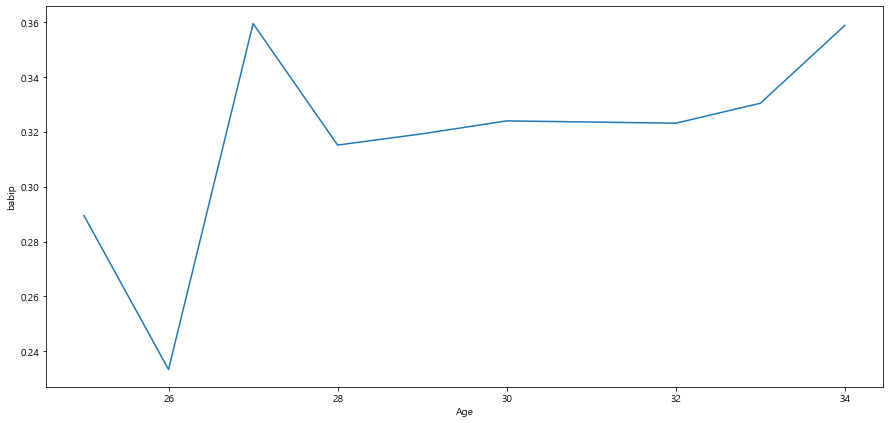

In [114]:
plt.figure(figsize=(15,7))
sns.lineplot(oh.Age, oh.babip)
plt.show()

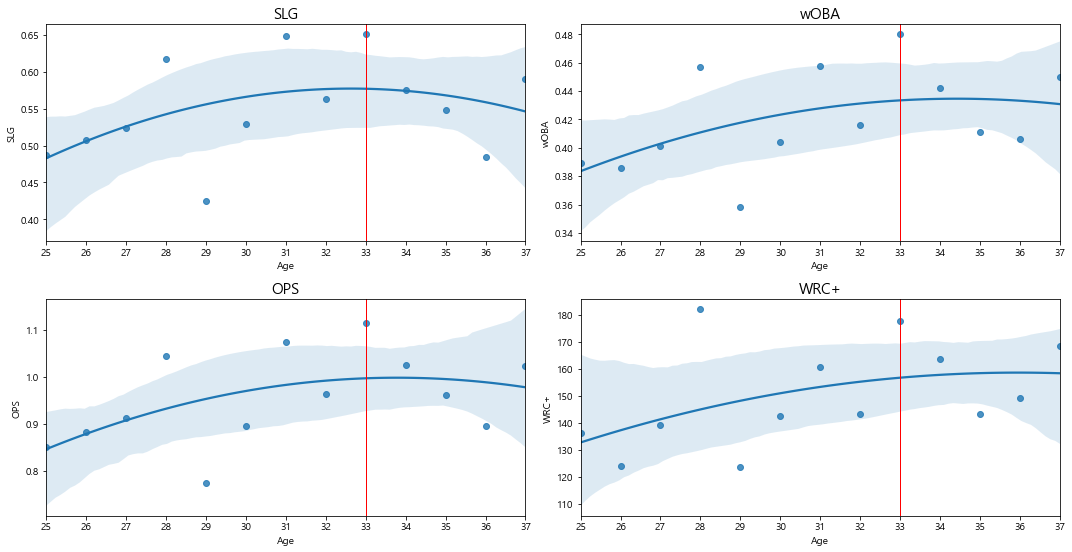

In [49]:
#최형우
multi_graph(choi, ['SLG', 'wOBA', 'OPS', 'WRC+'])